In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow

--2023-04-29 03:02:29--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.2’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M  33.7MB/s    in 13s     

2023-04-29 03:02:42 (32.4 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb.2’ saved [430460776/430460776]

(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.1.0.77-1+cuda11.2) ...
Setting up libcudnn8 (8.1.0.77-1+cuda11.2) ...
lrwxrwxrwx 1 root root     17 Jan 25  2021 /usr/lib/x86_64-linux-gn

In [ ]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

--2023-04-29 03:03:37--  https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
Resolving psfiles.link (psfiles.link)... 34.90.26.83
Connecting to psfiles.link (psfiles.link)|34.90.26.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59799 (58K) [application/zip]
Saving to: ‘mrcnn_demo_PIBVGJTEFX.zip’

mrcnn_demo_PIBVGJTE 100%[===================>]  58.40K  --.-KB/s    in 0.1s    

2023-04-29 03:03:38 (574 KB/s) - ‘mrcnn_demo_PIBVGJTEFX.zip’ saved [59799/59799]

Archive:  mrcnn_demo_PIBVGJTEFX.zip
   creating: maskrcnn_colab/
   creating: maskrcnn_colab/mrcnn_demo/
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcnn_demo/visualize.py  
VERS 0.5 - updated 11/03/2023


/content/maskrcnn_colab/mrcnn_demo/model.py:2378: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


... done downloading pretrained model!


In [ ]:
%cd /content/maskrcnn_colab/mrcnn_demo
!ls

/content/maskrcnn_colab/mrcnn_demo
config.py  m_rcnn.py	      __pycache__  visualize.py
model.py   parallel_model.py  utils.py


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/mrcnn_demo/")
from m_rcnn import *
%matplotlib inline

VERS 0.4 - updated 02/11/2022


/content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/mrcnn_demo/model.py:2378: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


## Training Image Origin

In [ ]:
# Extract Images
images_path = "/content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/images"
annotations_path = "/content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/label_KSSG.json"

In [ ]:
dataset_train = load_image_dataset(annotations_path, images_path, "train")
dataset_val = load_image_dataset(annotations_path, images_path, "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/label_KSSG.json
Annotation json path:  /content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/label_KSSG.json
Train: 447
Validation: 55
Classes: 1


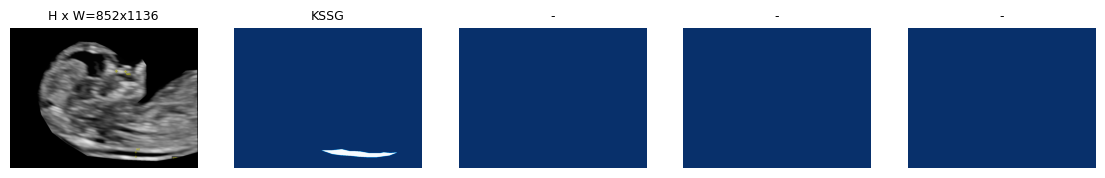

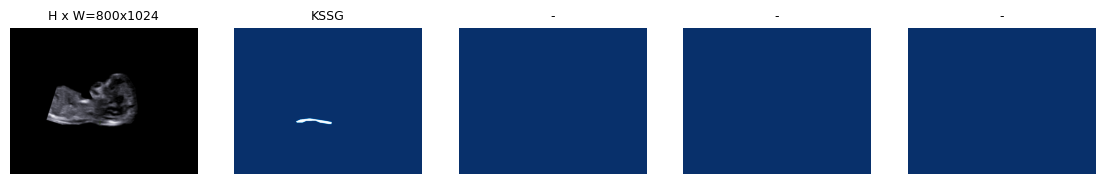

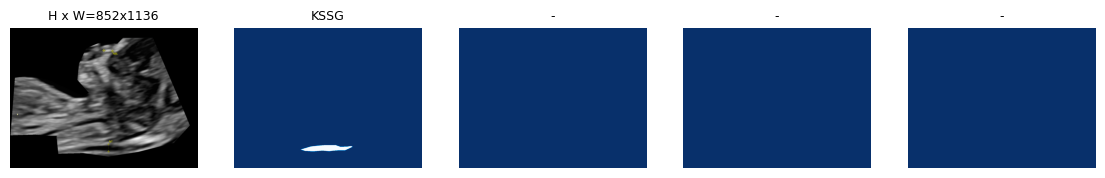

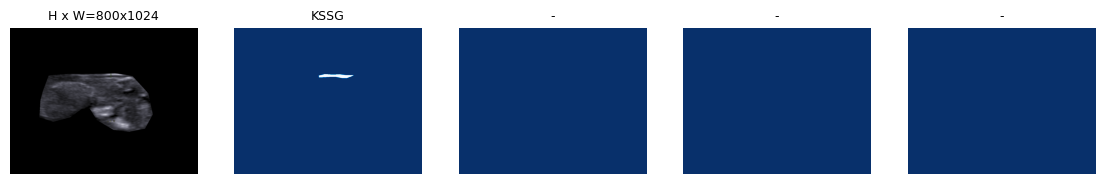

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

/content/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
train_head(model, dataset_train, dataset_val, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20230429T0307/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

AttributeError: ignored

In [ ]:
def load_test_model(num_classes):
    inference_config = InferenceConfig(num_classes)

    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode="inference",
                              config=inference_config,
                              model_dir=MODEL_DIR)

    # Get path to saved weights
    # Either set a specific path or find last trained weights
    # model_path = os.path.join(ROOT_DIR, ".h5 file name here")
    model_path = '/content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/logs/object20221102T0312/mask_rcnn_object_0006.h5'

    # Load trained weights
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)
    return model, inference_config

In [ ]:
test_model, inference_config = load_test_model(class_number)

TypeError: ignored

original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


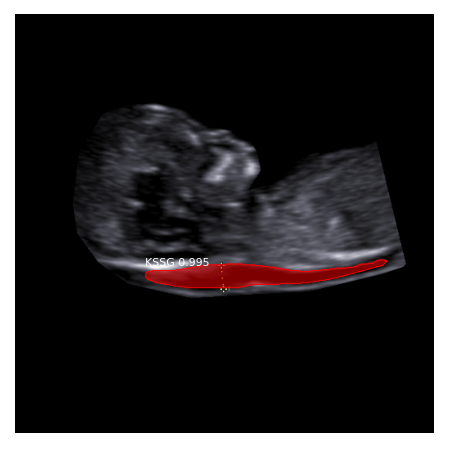

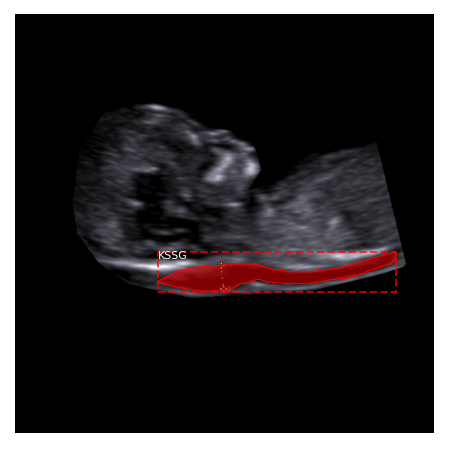

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

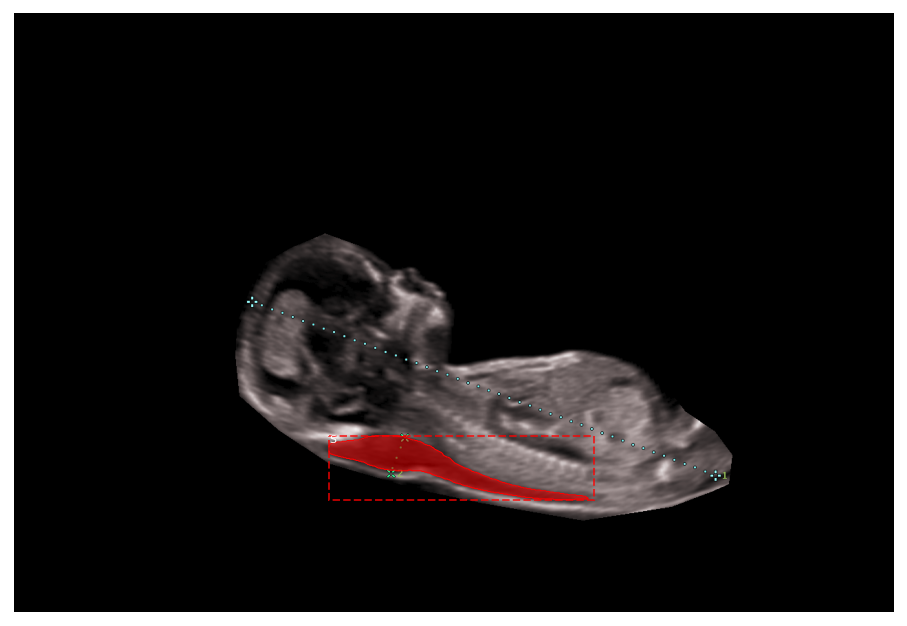

In [ ]:
from visualize import *
import cv2
img = cv2.imread('/content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/images/828f007a-A_017424_tr.png')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names='SS')

In [ ]:
print(history1)

None


### Trainning Hist

In [ ]:
# Extract Images
images_path = "/content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/images_hist"
annotations_path = "/content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/label_KSSG.json"

In [ ]:
dataset_train = load_image_dataset(annotations_path, images_path, "train")
dataset_val = load_image_dataset(annotations_path, images_path, "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/label_KSSG.json
Annotation json path:  /content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/label_KSSG.json
Train: 447
Validation: 55
Classes: 1


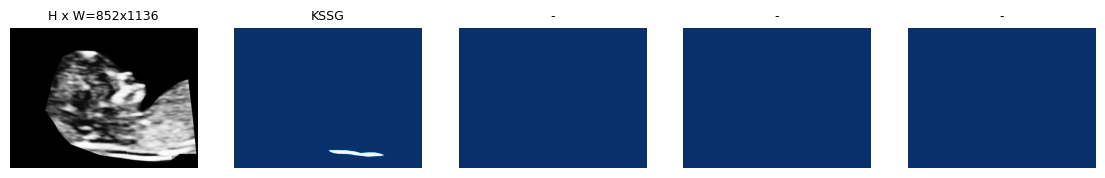

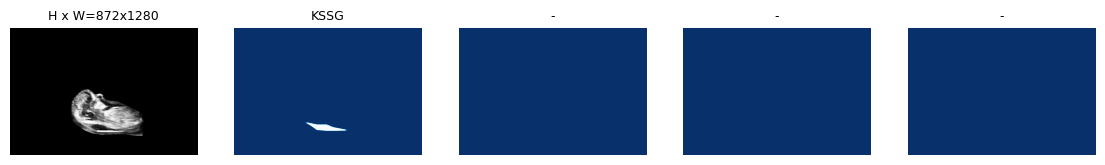

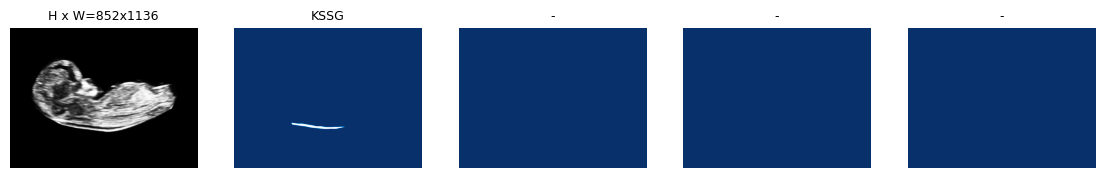

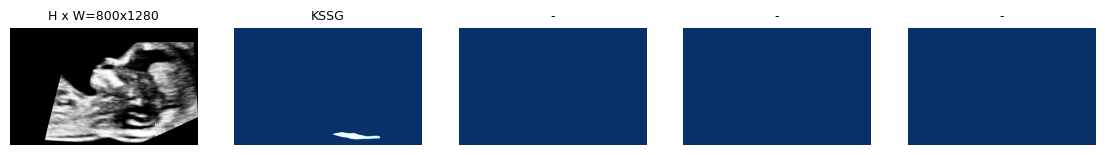

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model_2 = load_training_model(config)

/content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
history2 = model_2.train(dataset_train, dataset_val, learning_rate=config.LEARNING_RATE,
              epochs=7,
              layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/logs/object20230412T0529/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4 

ERROR:root:Error processing image {'id': 363, 'source': 'coco_like', 'path': '/content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/images_hist/41a10db8-P111_0004_11_tr.png', 'width': 1024, 'height': 800, 'annotations': [{'id': 362, 'iscrowd': 0, 'image_id': 363, 'category_id': 1, 'segmentation': [[696.32099432461, 589.4219796770275, 627.4158751454135, 596.3696539711842, 569.51241365029, 591.1588982505665, 517.9783329196305, 591.1588982505665, 467.0232868039221, 590.0009525348738, 410.2778945387014, 590.5799253927202, 374.9567830266762, 596.3696539711842, 340.2147061296022, 602.1593825496481, 318.2113907614554, 605.6332196967264, 352.3744330435781, 610.2650025594976, 398.6972022396767, 606.2121925545729, 440.38769451616537, 604.4752739810336, 493.6588790916787, 611.4229482751904, 530.7170944485576, 607.3701382702656, 580.5140713343636, 615.4757582801152, 620.4674597659987, 608.5280839859585, 630.3110482201696, 603.8963011231873]], 'bbox': [318.2113907614554, 589.4219796770275, 3

Epoch 1/7


ERROR:root:Error processing image {'id': 225, 'source': 'coco_like', 'path': '/content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/images_hist/07481f21-A_000020_3_tr.png', 'width': 1136, 'height': 852, 'annotations': [{'id': 224, 'iscrowd': 0, 'image_id': 225, 'category_id': 1, 'segmentation': [[956.4293371502382, 808.5052081410846, 921.0444354783277, 801.740828135142, 860.9138409299605, 796.617412713128, 823.30254646988, 797.3102519131708, 790.8374926432489, 792.1685816532855, 745.8718358259423, 785.7506212473646, 718.9909645849759, 780.6272058253504, 694.2270006441257, 779.9161117874363, 677.0478044627414, 780.6929805944025, 648.1973346714483, 777.5946682398361, 616.8145610645817, 778.876852987372, 590.8783510998352, 779.9962793821692, 565.3104228622109, 781.1651846160753, 538.1596962198507, 786.8116207868597, 503.1780189357941, 788.3214563773071, 538.3812506640522, 795.6683219930145, 561.190613316743, 799.929166882718, 598.1275348547919, 800.3368948971851, 632.581739429092, 

ValueError: ignored

In [ ]:
def load_test_model(num_classes):
    inference_config = InferenceConfig(num_classes)

    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode="inference",
                              config=inference_config,
                              model_dir=MODEL_DIR)

    # Get path to saved weights
    # Either set a specific path or find last trained weights
    # model_path = os.path.join(ROOT_DIR, ".h5 file name here")
    model_path = '/content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/logs/object20221102T0446/mask_rcnn_object_0004.h5'

    # Load trained weights
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)
    return model, inference_config

In [ ]:
def load_inference_model(num_classes, model_path):
    inference_config = InferenceConfig(num_classes)

    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode="inference",
                              config=inference_config,
                              model_dir=model_path)

    # Get path to saved weights
    # Either set a specific path or find last trained weights
    # model_path = os.path.join(ROOT_DIR, ".h5 file name here")
    #model_path = model.find_last()

    # Load trained weights
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)
    return model, inference_config

In [ ]:
model, inference_config = load_inference_model(class_number, '/content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/logs/object20221102T0312/mask_rcnn_object_0006.h5')

In [ ]:
inference_config = InferenceConfig(num_classes)
model = modellib.MaskRCNN(mode="inference",
                              config=inference_config,
                              model_dir=MODEL_DIR)
model_path = '/content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/logs/object20221102T0446/mask_rcnn_object_0004.h5'
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

In [ ]:
# Extract Images
images_path = "/content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/images_clahe"
annotations_path = "/content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/label_KSSG.json"

In [ ]:
dataset_train = load_image_dataset(annotations_path, images_path, "train")
dataset_val = load_image_dataset(annotations_path, images_path, "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/label_KSSG.json
Annotation json path:  /content/drive/MyDrive/BKAI/Project - KSSG/01 - DATA/Thainhi/label_KSSG.json
Train: 447
Validation: 55
Classes: 1


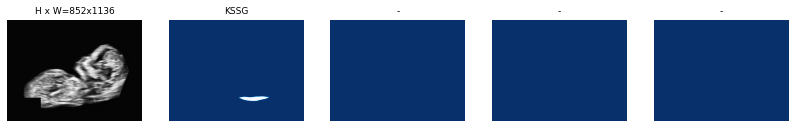

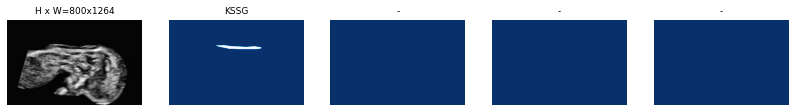

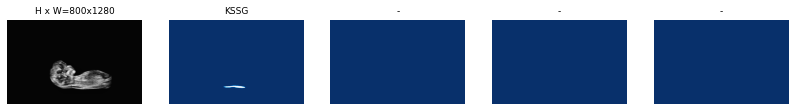

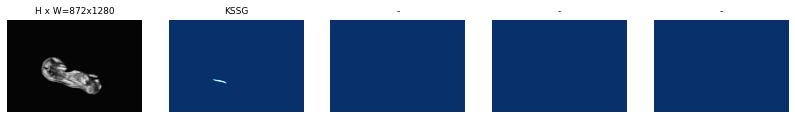

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model_3 = load_training_model(config)

/content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
history3 = model_3.train(dataset_train, dataset_val, learning_rate=config.LEARNING_RATE,
              epochs=7,
              layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/BKAI/Project - KSSG/02 - MODEL/maskrcnn_colab/logs/object20221102T0605/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4 